## 7.1 주요 R 패키지 이용
### 예제 7.1: Dunn 검정

In [1]:
install.packages("FSA")
library(FSA)
ponds = data.frame(pond = as.factor(rep(1:4, each = 8)),
                   pH = c(7.68, 7.69, 7.70, 7.70, 7.72, 7.73, 7.73, 7.76,
                          7.71, 7.73, 7.74, 7.74, 7.78, 7.78, 7.80, 7.81,
                          7.74, 7.75, 7.77, 7.78, 7.80, 7.81, 7.84, NA,
                          7.71, 7.71, 7.74, 7.79, 7.81, 7.85, 7.87, 7.91))
ponds2 = ponds[complete.cases(ponds), ]  # 결측치 제외 -> 불균형자료
kruskal.test(pH ~ pond, data = ponds2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘car’, ‘dunn.test’, ‘lmtest’, ‘plotrix’


## FSA v0.9.4. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.




	Kruskal-Wallis rank sum test

data:  pH by pond
Kruskal-Wallis chi-squared = 11.944, df = 3, p-value = 0.007579


+ 검정의 p-value < 0.05 $\rightarrow$ H0 기각o $\rightarrow$ 4개의 연못의 산성도는 모두 같다고 할 수 없다. $\rightarrow$ 다중비교 필요


In [2]:
dunnTest(ponds2$pH, ponds2$pond)  # method = holm(default)

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




  Comparison           Z     P.unadj      P.adj
1      1 - 2 -2.13700630 0.032597479 0.13038992
2      1 - 3 -2.94934889 0.003184443 0.01592221
3      2 - 3 -0.88480467 0.376261991 1.00000000
4      1 - 4 -2.99180882 0.002773299 0.01663979
5      2 - 4 -0.85480252 0.392660483 0.78532097
6      3 - 4  0.05898698 0.952962480 0.95296248

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-3, 1-4 유의

In [3]:
dunnTest(pH ~ pond, data = ponds2, method = "bonferroni")  # method = bonferroni

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




  Comparison           Z     P.unadj      P.adj
1      1 - 2 -2.13700630 0.032597479 0.19558488
2      1 - 3 -2.94934889 0.003184443 0.01910666
3      2 - 3 -0.88480467 0.376261991 1.00000000
4      1 - 4 -2.99180882 0.002773299 0.01663979
5      2 - 4 -0.85480252 0.392660483 1.00000000
6      3 - 4  0.05898698 0.952962480 1.00000000

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-3, 1-4 유의


In [4]:
dunnTest(pH ~ pond, data = ponds2, method = "bh")  # method = bh

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Benjamini-Hochberg method.




  Comparison           Z     P.unadj       P.adj
1      1 - 2 -2.13700630 0.032597479 0.065194958
2      1 - 3 -2.94934889 0.003184443 0.009553328
3      2 - 3 -0.88480467 0.376261991 0.564392987
4      1 - 4 -2.99180882 0.002773299 0.016639793
5      2 - 4 -0.85480252 0.392660483 0.471192580
6      3 - 4  0.05898698 0.952962480 0.952962480

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-3, 1-4 유의

In [5]:
dunnTest(pH ~ pond, data = ponds2, method = "none")  # method 미조정

Dunn (1964) Kruskal-Wallis multiple comparison

  with no adjustment for p-values.




  Comparison           Z     P.unadj       P.adj
1      1 - 2 -2.13700630 0.032597479 0.032597479
2      1 - 3 -2.94934889 0.003184443 0.003184443
3      2 - 3 -0.88480467 0.376261991 0.376261991
4      1 - 4 -2.99180882 0.002773299 0.002773299
5      2 - 4 -0.85480252 0.392660483 0.392660483
6      3 - 4  0.05898698 0.952962480 0.952962480

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-2, 1-3, 1-4 유의

In [6]:
dunnTest(pH ~ pond, data = ponds2, two.sided = FALSE) # 단측검정

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




  Comparison           Z     P.unadj       P.adj
1      1 - 2 -2.13700630 0.016298740 0.065194958
2      1 - 3 -2.94934889 0.001592221 0.007961106
3      2 - 3 -0.88480467 0.188130996 0.564392987
4      1 - 4 -2.99180882 0.001386649 0.008319896
5      2 - 4 -0.85480252 0.196330241 0.392660483
6      3 - 4  0.05898698 0.476481240 0.476481240

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-3, 1-4 유의

In [7]:
dunnTest(pH ~ pond, data = ponds)

Warning message:
“Some rows deleted from 'x' and 'g' because missing data.”
Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Holm method.




  Comparison           Z     P.unadj      P.adj
1      1 - 2 -2.13700630 0.032597479 0.13038992
2      1 - 3 -2.94934889 0.003184443 0.01592221
3      2 - 3 -0.88480467 0.376261991 1.00000000
4      1 - 4 -2.99180882 0.002773299 0.01663979
5      2 - 4 -0.85480252 0.392660483 0.78532097
6      3 - 4  0.05898698 0.952962480 0.95296248

+ unadj : 1-2, 1-3, 1-4 유의, adj : 1-3, 1-4 유의

In [8]:
tmp = dunnTest(pH ~ pond, data = ponds2)
print(tmp, dunn.test.results = TRUE)

  Kruskal-Wallis rank sum test 
  
 data: x and g 
 Kruskal-Wallis chi-squared = 11.9435, df = 3, p-value = 0.01 
  
  
                              Comparison of x by g                               
                                     (Holm)                                      
 Col Mean-| 
 Row Mean |          1          2          3 
 ---------+--------------------------------- 
        2 |  -2.137006 
          |     0.1304 
          | 
        3 |  -2.949348  -0.884804 
          |    0.0159*     1.0000 
          | 
        4 |  -2.991808  -0.854802   0.058986 
          |    0.0166*     0.7853     0.9530 
  
 alpha = 0.05 
 Reject Ho if p <= alpha 


+ 실험별오류율 0.05에 대하여 1-3, 1-4 유의

### 예제 7.2: Dunn 검정

In [9]:
install.packages("dunn.test")
library(dunn.test)
attach(airquality)
dunn.test(Ozone, Month, kw = FALSE, method = "bonferroni", altp = T)  # method = bonferroni

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




                         Comparison of Ozone by Month                          
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          5          6          7          8
---------+--------------------------------------------
       6 |  -0.925158
         |     1.0000
         |
       7 |  -4.419470  -2.244208
         |    0.0001*     0.2482
         |
       8 |  -4.132813  -2.038635   0.286657
         |    0.0004*     0.4149     1.0000
         |
       9 |  -1.321202   0.002538   3.217199   2.922827
         |     1.0000     1.0000    0.0129*    0.0347*

alpha = 0.05
Reject Ho if p <= alpha


+ 실험별오류율 0.05에 대하여 5-7, 5-8, 7-9, 8-9 유의

In [10]:
dunn.test(Ozone, Month, kw = FALSE, method = "hs", altp = T)  # method = hs


                         Comparison of Ozone by Month                          
                                 (Holm-Šidák)                                  
Col Mean-|
Row Mean |          5          6          7          8
---------+--------------------------------------------
       6 |  -0.925158
         |     0.7315
         |
       7 |  -4.419470  -2.244208
         |    0.0001*     0.1400
         |
       8 |  -4.132813  -2.038635   0.286657
         |    0.0003*     0.1909     0.9491
         |
       9 |  -1.321202   0.002538   3.217199   2.922827
         |     0.5619     0.9980    0.0103*    0.0240*

alpha = 0.05
Reject Ho if p <= alpha


+ 실험별오류율 0.05에 대하여 5-7, 5-8, 7-9, 8-9 유의

In [11]:
dunn.test(Ozone, Month, kw = FALSE, method = "bh", altp = T)  # method = bh


                         Comparison of Ozone by Month                          
                             (Benjamini-Hochberg)                              
Col Mean-|
Row Mean |          5          6          7          8
---------+--------------------------------------------
       6 |  -0.925158
         |     0.4436
         |
       7 |  -4.419470  -2.244208
         |    0.0001*    0.0496*
         |
       8 |  -4.132813  -2.038635   0.286657
         |    0.0002*     0.0691     0.8604
         |
       9 |  -1.321202   0.002538   3.217199   2.922827
         |     0.2663     0.9980    0.0043*    0.0087*

alpha = 0.05
Reject Ho if p <= alpha


+ 실험별오류율 0.05에 대하여 5-7, 5-8, 6-7, 7-9, 8-9 유의

In [12]:
dunn.test(Ozone, Month, kw = FALSE, method = "bonferroni", altp = F)  # method = bonferroni


                         Comparison of Ozone by Month                          
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |          5          6          7          8
---------+--------------------------------------------
       6 |  -0.925158
         |     1.0000
         |
       7 |  -4.419470  -2.244208
         |    0.0000*     0.1241
         |
       8 |  -4.132813  -2.038635   0.286657
         |    0.0002*     0.2074     1.0000
         |
       9 |  -1.321202   0.002538   3.217199   2.922827
         |     0.9322     1.0000    0.0065*    0.0173*

alpha = 0.05
Reject Ho if p <= alpha/2


+ 실험별오류율 0.025에 대하여 5-7, 5-8, 7-9, 8-9 유의

### 예제 7.3

In [13]:
install.packages("pgirmess")
library(pgirmess)
resp = c(0.44, 0.44, 0.54, 0.32, 0.21, 0.28, 0.7, 0.77, 0.48,
         0.64, 0.71, 0.75, 0.8, 0.76, 0.34, 0.80, 0.73, 0.8)
categ = as.factor(rep(c("A", "B", "C"), times = 1, each = 6))
kruskalmc(resp ~ categ)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘wk’, ‘proxy’, ‘classInt’, ‘s2’, ‘units’, ‘spData’, ‘deldir’, ‘e1071’, ‘sf’, ‘sp’, ‘spdep’


The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



,obs.dif,critical.dif,stat.signif
,<dbl>,<dbl>,<lgl>
A-B,6.666667,7.378741,FALSE
A-C,9.333333,7.378741,TRUE
B-C,2.666667,7.378741,FALSE


+ A-C 유의

In [14]:
kruskalmc(resp ~ categ, probs = 0.01)

,obs.dif,critical.dif,stat.signif
,<dbl>,<dbl>,<lgl>
A-B,6.666667,7.378741,FALSE
A-C,9.333333,7.378741,TRUE
B-C,2.666667,7.378741,FALSE


+ A-C 유의

In [15]:
kruskalmc(resp ~ categ, cont = "one-tailed")

,obs.dif,critical.dif,stat.signif
,<dbl>,<dbl>,<lgl>
A-B,6.666667,6.041015,TRUE
A-C,9.333333,6.041015,TRUE


+ 다대일(MCC) + A-B, A-C 유의

In [16]:
kruskalmc(resp ~ categ, cont = "two-tailed")

,obs.dif,critical.dif,stat.signif
,<dbl>,<dbl>,<lgl>
A-B,6.666667,6.908467,FALSE
A-C,9.333333,6.908467,TRUE


+ 다대일(MCC) + A-C 유의

## 7.2 {agricolae} 패키지 이용
### 예제 7.4: Kruskal-wallis 검정

In [17]:
install.packages("agricolae")
library(agricolae)
data(corn)
str(corn)
str(kruskal)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘R.cache’, ‘shiny’, ‘miniUI’, ‘styler’, ‘labelled’, ‘combinat’, ‘questionr’, ‘klaR’, ‘AlgDesign’




'data.frame':	34 obs. of  3 variables:
 $ method     : int  1 1 1 1 1 1 1 1 1 2 ...
 $ observation: int  83 91 94 89 89 96 91 92 90 91 ...
 $ rx         : num  11 23 28.5 17 17 31.5 23 26 19.5 23 ...
function (y, trt, alpha = 0.05, p.adj = c("none", "holm", "hommel", "hochberg", 
    "bonferroni", "BH", "BY", "fdr"), group = TRUE, main = NULL, console = FALSE)  


In [18]:
outKruskal.none = with(corn, kruskal(observation, method, group = FALSE, p.adj = "none"))
print(outKruskal.none)

$statistics
     Chisq Df      p.chisq
  25.62884  3 1.140573e-05

$parameters
            test p.ajusted name.t ntr alpha
  Kruskal-Wallis      none method   4  0.05

$means
  observation     rank      std  r Min Max   Q25  Q50   Q75
1    90.55556 21.83333 3.643869  9  83  96 89.00 91.0 92.00
2    86.40000 15.30000 3.777124 10  81  91 83.25 86.0 89.75
3    95.71429 29.57143 3.638419  7  91 101 93.50 95.0 98.00
4    79.87500  4.81250 1.726888  8  77  82 78.75 80.5 81.00

$comparison
      Difference pvalue Signif.        LCL       UCL
1 - 2   6.533333 0.0071      **   1.916316 11.150351
1 - 3  -7.738095 0.0040      ** -12.802119 -2.674072
1 - 4  17.020833 0.0000     ***  12.138086 21.903580
2 - 3 -14.271429 0.0000     *** -19.223438 -9.319419
2 - 4  10.487500 0.0001     ***   5.721026 15.253974
3 - 4  24.758929 0.0000     ***  19.558279 29.959578

$groups
NULL

attr(,"class")
[1] "group"


+ a/b/c/d로 그룹핑

### 예제 7.5: Kruskal-wallis 검정, 조정된 p값 사용

In [19]:
outKruskal.bonf = with(corn, kruskal(observation, method, group = FALSE, p.adj = "bonferroni"))
print(outKruskal.bonf)

$statistics
     Chisq Df      p.chisq
  25.62884  3 1.140573e-05

$parameters
            test  p.ajusted name.t ntr alpha
  Kruskal-Wallis bonferroni method   4  0.05

$means
  observation     rank      std  r Min Max   Q25  Q50   Q75
1    90.55556 21.83333 3.643869  9  83  96 89.00 91.0 92.00
2    86.40000 15.30000 3.777124 10  81  91 83.25 86.0 89.75
3    95.71429 29.57143 3.638419  7  91 101 93.50 95.0 98.00
4    79.87500  4.81250 1.726888  8  77  82 78.75 80.5 81.00

$comparison
      Difference pvalue Signif.         LCL        UCL
1 - 2   6.533333 0.0426       *   0.1474712 12.9191955
1 - 3  -7.738095 0.0238       * -14.7422174 -0.7339731
1 - 4  17.020833 0.0000     ***  10.2674375 23.7742292
2 - 3 -14.271429 0.0000     *** -21.1206220 -7.4222351
2 - 4  10.487500 0.0006     ***   3.8949224 17.0800776
3 - 4  24.758929 0.0000     ***  17.5658367 31.9520205

$groups
NULL

attr(,"class")
[1] "group"


In [20]:
outKruskal.holm = with(corn, kruskal(observation, method, group = FALSE, p.adj = "holm"))
print(outKruskal.holm$comparison)

      Difference pvalue Signif.
1 - 2   6.533333 0.0079      **
1 - 3  -7.738095 0.0079      **
1 - 4  17.020833 0.0000     ***
2 - 3 -14.271429 0.0000     ***
2 - 4  10.487500 0.0003     ***
3 - 4  24.758929 0.0000     ***


In [21]:
outKruskal.holm = with(corn, kruskal(observation, method, group = TRUE, p.adj = "holm"))
print(outKruskal.holm$groups)

  observation groups
3    29.57143      a
1    21.83333      b
2    15.30000      c
4     4.81250      d


+ a/b/c/d로 그룹핑

### 예제 7.6: Friedman 검정

In [22]:
str(friedman)
data(grass)
out = with(grass, friedman(judge, trt, evaluation, alpha = 0.05, group = FALSE, console = TRUE,
                           main = "Data of the book of Conover"))

function (judge, trt, evaluation, alpha = 0.05, group = TRUE, main = NULL, 
    console = FALSE)  

Study: Data of the book of Conover 

trt,  Sum of the ranks

   evaluation  r
t1       38.0 12
t2       23.5 12
t3       24.5 12
t4       34.0 12

Friedman's Test
Adjusted for ties
Critical Value: 8.097345
P.Value Chisq: 0.04404214
F Value: 3.192198
P.Value F: 0.03621547 

Post Hoc Analysis

Comparison between treatments
Sum of the ranks

        difference pvalue signif.    LCL   UCL
t1 - t2       14.5 0.0149       *   3.02 25.98
t1 - t3       13.5 0.0226       *   2.02 24.98
t1 - t4        4.0 0.4834          -7.48 15.48
t2 - t3       -1.0 0.8604         -12.48 10.48
t2 - t4      -10.5 0.0717       . -21.98  0.98
t3 - t4       -9.5 0.1017         -20.98  1.98


### 예제 7.7: Median 검정

In [23]:
str(Median.test)
data("sweetpotato")
outMedian = with(sweetpotato, Median.test(yield, virus, console = TRUE))

function (y, trt, alpha = 0.05, correct = TRUE, simulate.p.value = FALSE, 
    group = TRUE, main = NULL, console = TRUE)  

The Median Test for yield ~ virus 

Chi Square = 6.666667   DF = 3   P.Value 0.08331631
Median = 28.25 

   Median r  Min  Max   Q25   Q75
cc   23.0 3 21.7 28.5 22.35 25.75
fc   13.1 3 10.6 14.9 11.85 14.00
ff   39.2 3 28.0 41.8 33.60 40.50
oo   38.2 3 32.1 40.4 35.15 39.30

Post Hoc Analysis

Groups according to probability of treatment differences and alpha level.

Treatments with the same letter are not significantly different.

   yield groups
ff  39.2      a
oo  38.2      a
cc  23.0      a
fc  13.1      b


+ ff, oo, cc/fc로 그룹핑

In [24]:
names(outMedian)
outMedian$statistics
outMedian$medians

[1] "statistics" "parameters" "medians"    "comparison" "groups"

,Chisq,Df,p.chisq,Median
,<dbl>,<int>,<dbl>,<dbl>
,6.666667,3,0.08331631,28.25


,Median,r,Min,Max,Q25,Q75
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
cc,23.0,3,21.7,28.5,22.35,25.75
fc,13.1,3,10.6,14.9,11.85,14.00
ff,39.2,3,28.0,41.8,33.60,40.50
oo,38.2,3,32.1,40.4,35.15,39.30


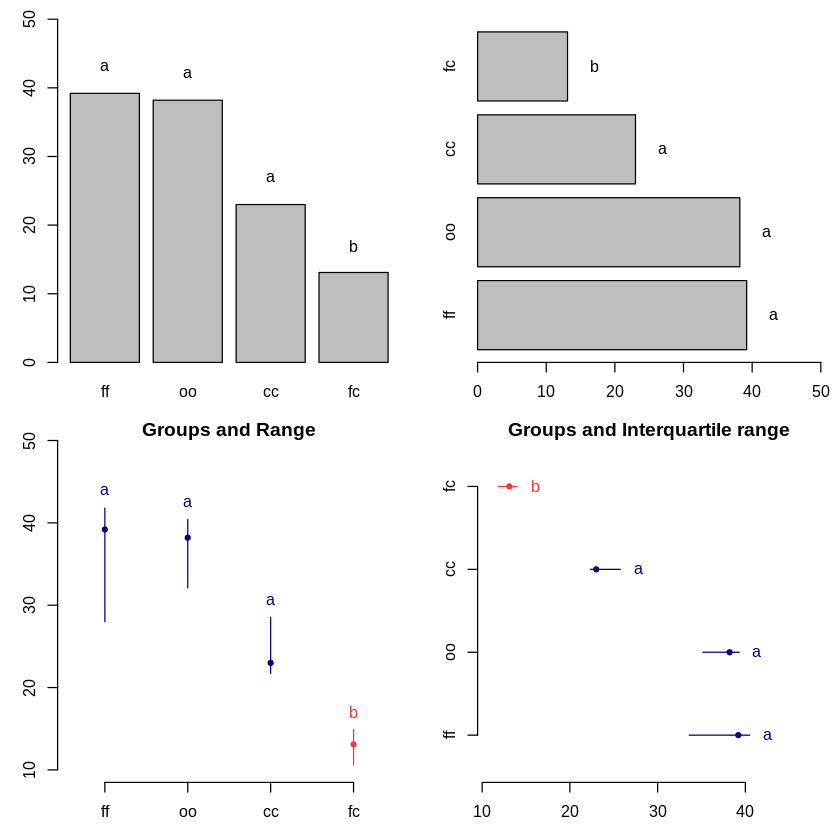

In [25]:
oldpar = par(mfrow = c(2, 2), mar = c(3, 3, 1, 1), cex = 0.8)
bar.group(outMedian$groups, ylim = c(0, 50))
bar.group(outMedian$groups, xlim = c(0, 50), horiz = TRUE)
plot(outMedian)
plot(outMedian, variation = "IQR", horiz = TRUE)
par(oldpar)

### 예제 7.8: van der Waerden 검정

In [26]:
str(waerden.test)
data("sweetpotato")
outWaerden = with(sweetpotato, waerden.test(yield, virus, alpha = 0.01, group = TRUE, console = TRUE))

function (y, trt, alpha = 0.05, group = TRUE, main = NULL, console = FALSE)  

Study: yield ~ virus
Van der Waerden (Normal Scores) test's

Value : 8.409979
Pvalue: 0.03825667
Degrees of Freedom:  3 

virus,  means of the normal score

        yield       std r
cc -0.2328353 0.3028832 3
fc -1.0601764 0.3467934 3
ff  0.6885684 0.7615582 3
oo  0.6044433 0.3742929 3

Post Hoc Analysis

Alpha: 0.01 ; DF Error: 8 

Minimum Significant Difference: 1.322487 

Treatments with the same letter are not significantly different.

Means of the normal score

        score groups
ff  0.6885684      a
oo  0.6044433      a
cc -0.2328353     ab
fc -1.0601764      b


+ ff, oo, cc/cc, fc로 그룹핑

In [27]:
names(outWaerden)
out = with(sweetpotato, waerden.test(yield, virus, group = FALSE, console = TRUE))

[1] "statistics" "parameters" "means"      "comparison" "groups"


Study: yield ~ virus
Van der Waerden (Normal Scores) test's

Value : 8.409979
Pvalue: 0.03825667
Degrees of Freedom:  3 

virus,  means of the normal score

        yield       std r
cc -0.2328353 0.3028832 3
fc -1.0601764 0.3467934 3
ff  0.6885684 0.7615582 3
oo  0.6044433 0.3742929 3

Post Hoc Analysis

Comparison between treatments
mean of the normal score

        difference pvalue signif.         LCL         UCL
cc - fc  0.8273411 0.0690       . -0.08154345  1.73622564
cc - ff -0.9214037 0.0476       * -1.83028827 -0.01251917
cc - oo -0.8372786 0.0664       . -1.74616316  0.07160593
fc - ff -1.7487448 0.0022      ** -2.65762936 -0.83986026
fc - oo -1.6646197 0.0029      ** -2.57350426 -0.75573516
ff - oo  0.0841251 0.8363         -0.82475944  0.99300965


### 예제 7.9: Durbin 검정

In [28]:
str(durbin.test)
days = gl(7, 3)
chemical = c("A", "B", "D", "A", "C", "E", "C", "D", "G", "A", "F", "G",
             "B", "C", "F", "B", "E", "G", "D", "E", "F")
toxic = c(0.465, 0.343, 0.396, 0.602, 0.873, 0.634, 0.875, 0.325, 0.330, 0.423, 0.987, 0.426,
          0.652, 1.142, 0.989, 0.536, 0.409, 0.309, 0.609, 0.417, 0.931)
head(data.frame(days, chemical, toxic))

function (judge, trt, evaluation, alpha = 0.05, group = TRUE, main = NULL, 
    console = FALSE)  


,days,chemical,toxic
,<fct>,<chr>,<dbl>
1,1,A,0.465
2,1,B,0.343
3,1,D,0.396
4,2,A,0.602
5,2,C,0.873
6,2,E,0.634


In [29]:
out = durbin.test(days, chemical, toxic, group = FALSE, console = TRUE,
                  main = "Logarithm of the toxic dose")
names(out)
out$statistics


Study: Logarithm of the toxic dose 
chemical,  Sum of ranks

  sum
A   5
B   5
C   9
D   5
E   5
F   8
G   5

Durbin Test
Value      : 7.714286
DF 1       : 6
P-value    : 0.2597916
Alpha      : 0.05
DF 2       : 8
t-Student  : 2.306004

Least Significant Difference
between the sum of ranks:  5.00689 

Parameters BIB
Lambda     : 1
Treatmeans : 7
Block size : 3
Blocks     : 7
Replication: 3 

Comparison between treatments
Sum of the ranks

      difference pvalue signif.
A - B          0 1.0000        
A - C         -4 0.1026        
A - D          0 1.0000        
A - E          0 1.0000        
A - F         -3 0.2044        
A - G          0 1.0000        
B - C         -4 0.1026        
B - D          0 1.0000        
B - E          0 1.0000        
B - F         -3 0.2044        
B - G          0 1.0000        
C - D          4 0.1026        
C - E          4 0.1026        
C - F          1 0.6574        
C - G          4 0.1026        
D - E          0 1.0000        
D - F      

[1] "statistics" "parameters" "means"      "rank"       "comparison"
[6] "groups"

,chisq.value,p.value,t.value,LSD
,<dbl>,<dbl>,<dbl>,<dbl>
,7.714286,0.2597916,2.306004,5.00689


+ 다중비교 p-value > 0.05이므로 A~G까지 차이가 없는 한 집단이라고 할 수 있다.